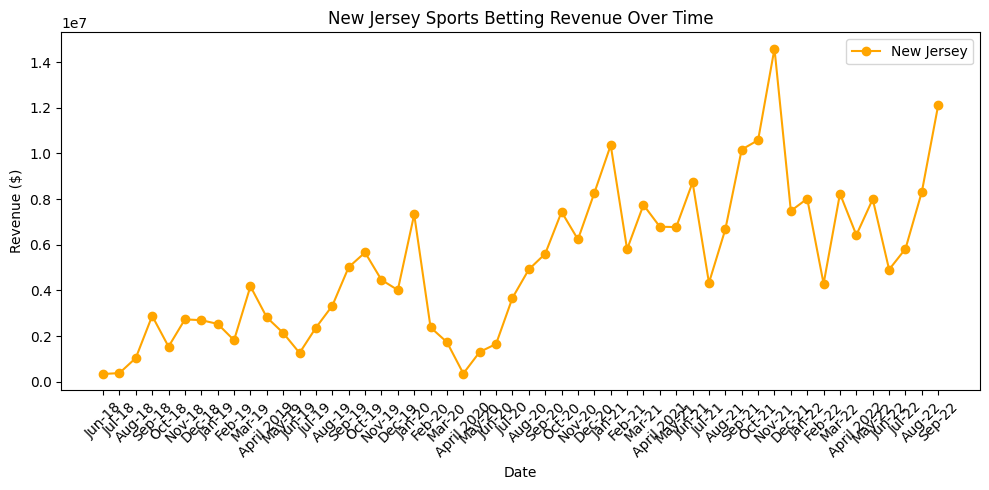

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the New Jersey CSV file
revenue_data = pd.read_csv('New Jersey.csv')

# Clean the 'New Jersey' column: Remove '$' and ',' and convert to float
revenue_data['New Jersey'] = revenue_data['New Jersey'].str.replace('[$,]', '', regex=True).astype(float)

# Plot revenue trends for New Jersey
plt.figure(figsize=(10, 5))
plt.plot(revenue_data['date'], revenue_data['New Jersey'], marker='o', color='orange', label='New Jersey')

# Add labels, title, and legend
plt.title('New Jersey Sports Betting Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

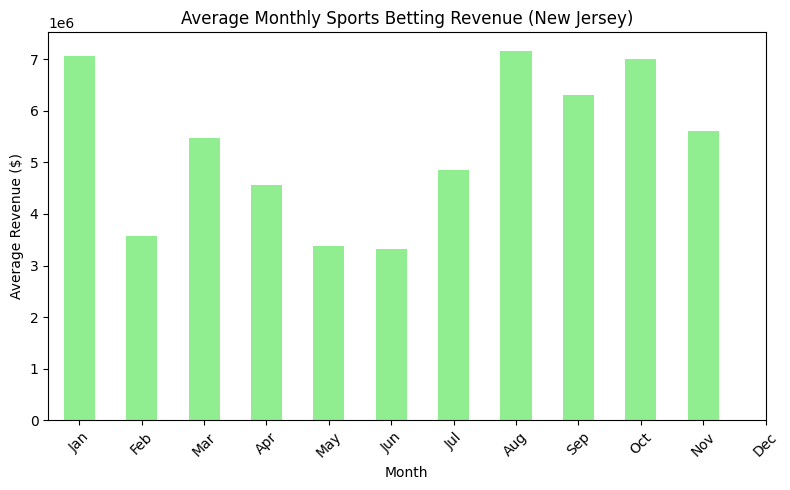

In [2]:
# Extract months from the 'date' column
revenue_data['month'] = pd.to_datetime(revenue_data['date'], format='%b-%y', errors='coerce').dt.month

# Group by month and calculate the average revenue for New Jersey
monthly_avg_revenue = revenue_data.groupby('month')['New Jersey'].mean()

# Bar plot for average monthly revenue
plt.figure(figsize=(8, 5))
monthly_avg_revenue.plot(kind='bar', color='lightgreen')
plt.title('Average Monthly Sports Betting Revenue (New Jersey)')
plt.xlabel('Month')
plt.ylabel('Average Revenue ($)')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

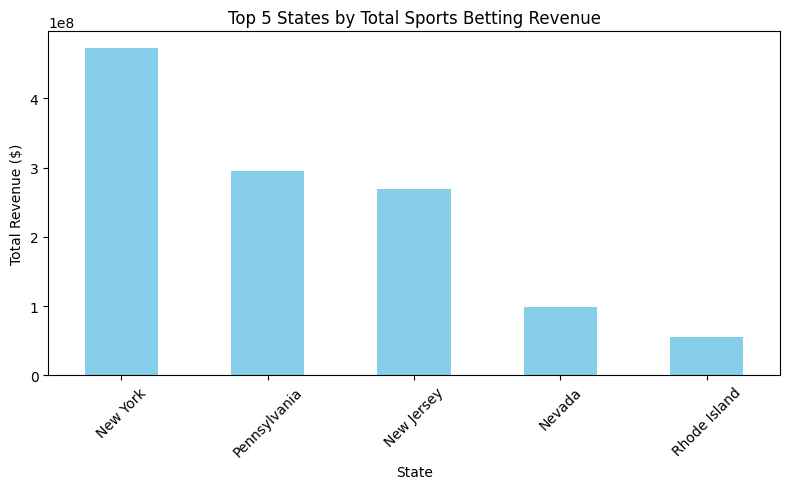

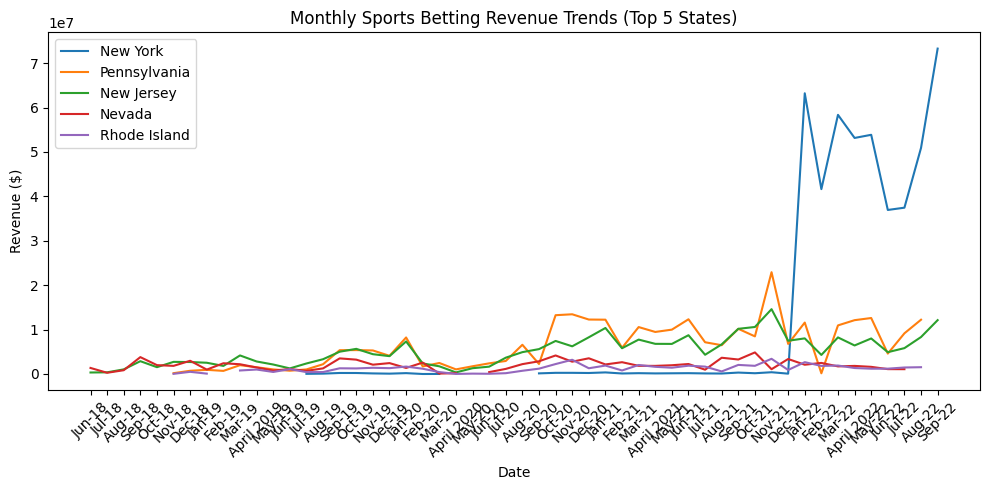

In [3]:
# Ensure non-numeric columns are properly converted before cleaning
columns_to_clean = revenue_data.columns[1:]  # Skip the 'date' column
for col in columns_to_clean:
    if revenue_data[col].dtype == 'object':  # Only clean string columns
        revenue_data[col] = pd.to_numeric(
            revenue_data[col].str.replace('[$,]', '', regex=True), errors='coerce'
        )

# Step 1: Total revenue for all states
state_totals = revenue_data.iloc[:, 1:].sum().sort_values(ascending=False)

# Visualization: Top 5 States by Total Revenue
top_5_states = state_totals.head(5)
plt.figure(figsize=(8, 5))
top_5_states.plot(kind='bar', color='skyblue')
plt.title('Top 5 States by Total Sports Betting Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 2: Monthly averages for top states
plt.figure(figsize=(10, 5))
for state in top_5_states.index:
    if state in revenue_data.columns:
        plt.plot(revenue_data['date'], revenue_data[state], label=state)

# Visualization: Monthly Revenue Trends for Top States
plt.title('Monthly Sports Betting Revenue Trends (Top 5 States)')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
import praw
import pandas as pd

# Authenticate with Reddit API
reddit = praw.Reddit(
    client_id='_RqudikFJep9QdHwaCNKRQ',
    client_secret='jGOILeoiYZg6TBiM7wbIINVlyArZBw',
    user_agent='MyApp/1.0 by mongnyong'
)

# Fetch posts from r/sportsbetting
posts = []
subreddit = reddit.subreddit("sportsbetting")
for post in subreddit.hot(limit=500):  # Fetch top 100 posts
    posts.append([post.title, post.selftext, post.created_utc])

# Save to a DataFrame
posts_df = pd.DataFrame(posts, columns=["Title", "Content", "Timestamp"])
print(posts_df.head())

                                               Title  \
0      December 13, 2024 Daily Sports Betting Thread   
1                            Recommended Sportsbooks   
2  First POTD to ever end in a push. Congrats to ...   
3    POTD: Pacers @ 76ers over 228 | 7.84U to win 7U   
4                       As predicted, post deleted 😂   

                                             Content     Timestamp  
0                             Let's make some money!  1.734070e+09  
1  **The below international sportsbooks are acce...  1.712492e+09  
2                                                     1.734143e+09  
3                                                     1.734131e+09  
4                                                     1.734118e+09  


In [5]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Define a cleaning function
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', str(text))  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Clean the Title and Content columns
posts_df['Cleaned_Title'] = posts_df['Title'].apply(clean_text)
posts_df['Cleaned_Content'] = posts_df['Content'].apply(clean_text)
print(posts_df[['Title', 'Cleaned_Title']].head())


                                               Title  \
0      December 13, 2024 Daily Sports Betting Thread   
1                            Recommended Sportsbooks   
2  First POTD to ever end in a push. Congrats to ...   
3    POTD: Pacers @ 76ers over 228 | 7.84U to win 7U   
4                       As predicted, post deleted 😂   

                                  Cleaned_Title  
0  december 13 2024 daily sports betting thread  
1                       recommended sportsbooks  
2    first potd ever end push congrats got 2275  
3             potd pacers 76ers 228 784u win 7u  
4                        predicted post deleted  


In [6]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Define a function to truncate text
def truncate_text(text, max_length=512):
	return text[:max_length]

# Apply sentiment analysis with truncation
posts_df['Sentiment_Title'] = posts_df['Title'].apply(lambda x: sentiment_pipeline(truncate_text(x))[0]['label'])
posts_df['Sentiment_Content'] = posts_df['Content'].apply(lambda x: sentiment_pipeline(truncate_text(x))[0]['label'])
print(posts_df[['Title', 'Sentiment_Title']].head())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


                                               Title Sentiment_Title
0      December 13, 2024 Daily Sports Betting Thread        NEGATIVE
1                            Recommended Sportsbooks        POSITIVE
2  First POTD to ever end in a push. Congrats to ...        POSITIVE
3    POTD: Pacers @ 76ers over 228 | 7.84U to win 7U        POSITIVE
4                       As predicted, post deleted 😂        NEGATIVE


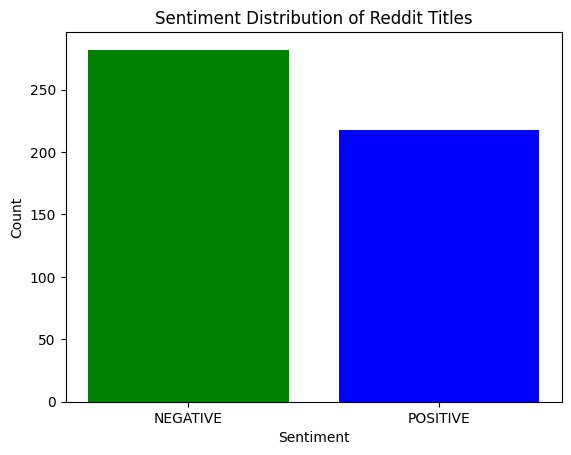

In [7]:
import matplotlib.pyplot as plt

# Count sentiments for titles
sentiment_counts = posts_df['Sentiment_Title'].value_counts()

# Plot sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'red'])
plt.title("Sentiment Distribution of Reddit Titles")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


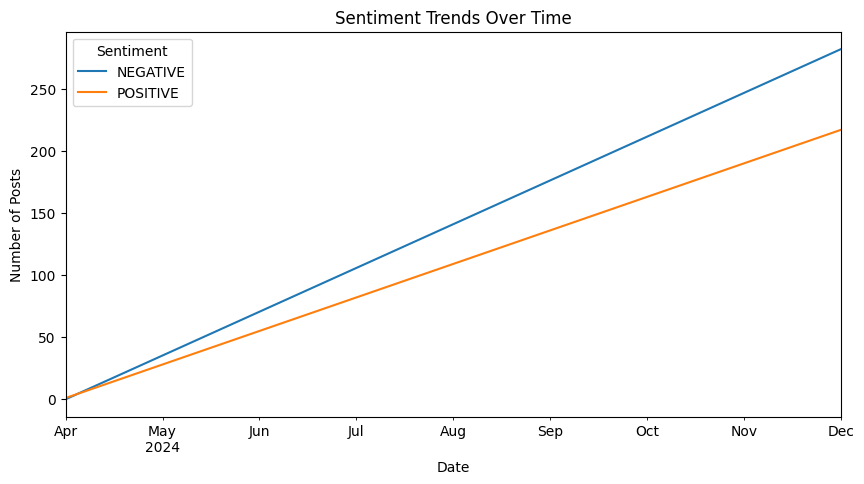

In [10]:
# Convert timestamps to datetime
posts_df['Date'] = pd.to_datetime(posts_df['Timestamp'], unit='s')

# Group by date and sentiment
sentiment_trends = posts_df.groupby([posts_df['Date'].dt.to_period('M'), 'Sentiment_Title']).size().unstack()

# Fill missing sentiment data with zeros
sentiment_trends = sentiment_trends.fillna(0)

# Plot sentiment trends
sentiment_trends.plot(kind='line', figsize=(10, 5))
plt.title("Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment")
plt.show()